# TecNets-NP

## emb_samplingしたものを使う

In [59]:
path = "./logs/0705-093621_np_emb0_z20_7200_emb/results.pkl"
# path = "./sentences_penuts/0706-074739_np_emb0_z20_16500/results.pkl"
# path = "./sentences_penuts/0707-235015_np_45/results.pkl"

In [60]:
from utils import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

emb = extract_emb_np(path)
train_means = emb["train_means"]
train_stds = emb["train_stds"]
test_means = emb["test_means"]
test_stds = emb["test_stds"]
means = emb["means"]
stds = emb["stds"]

train_means.shape, train_stds.shape
(90, 20) (90, 20)
test_means.shape, test_stds.shape
(90, 20) (90, 20)
means.shape, stds.shape
(180, 20) (180, 20)


## Train-task

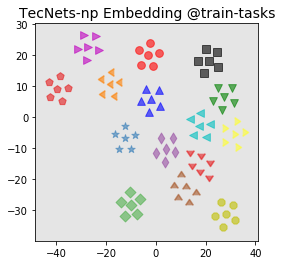

In [67]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(train_means)

fig, ax = plt_base("TecNets-np Embedding @train-tasks")
for i in range(90):
    plt.scatter(X_reduced[i:i+1, 0], X_reduced[i:i+1, 1], color=colors[i//6], marker=markers[i//6], \
                s=60, alpha=0.6) # , c=digits.target # (train_stds[i].mean()/train_stds.min())*2
plt.show()

## Test-task

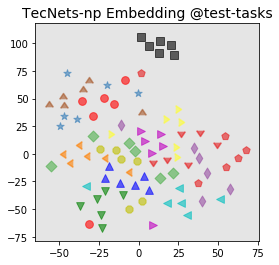

In [66]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(test_means)

fig, ax = plt_base("TecNets-np Embedding @test-tasks")
for i in range(90):
    plt.scatter(X_reduced[i:i+1, 0], X_reduced[i:i+1, 1], color=colors[i//6], marker=markers[i//6], \
                s=60, alpha=0.6) # , c=digits.target # (test_stds[i].mean()/test_stds.min())*2
plt.show()

## Train & Test task

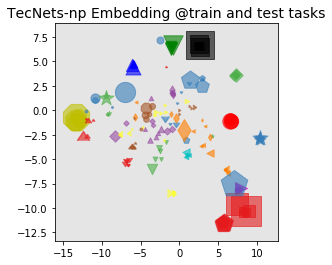

In [71]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(means)

fig, ax = plt_base("TecNets-np Embedding @train and test tasks")
for i in range(90):
    plt.scatter(X_reduced[i:i+1, 0], X_reduced[i:i+1, 1], color=colors[i//6], marker=markers[i//6], \
                s=(stds[i].mean()/stds.min())*2, alpha=0.6)
for i in range(90,180):
    plt.scatter(X_reduced[i:i+1, 0], X_reduced[i:i+1, 1], color=colors[i//6], marker=markers[i//6], \
                s=(stds[i].mean()/stds.min())*2, alpha=0.6)
plt.show()

# TecNets

In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

with open("sentences_tecnets/0706-070808_ml_5800_train/results.pkl", "rb") as f:
    results = pickle.load(f)
train_mean = np.array([np.squeeze(result['sentence']) for result in results])
# train_paths = [result['demo_path'] for result in results]

with open("sentences_tecnets/0706-073432_ml_5800_test/results.pkl", "rb") as f:
    results = pickle.load(f)
test_mean = np.array([np.squeeze(result['sentence']) for result in results])
# test_paths = [result['demo_path'] for result in results]

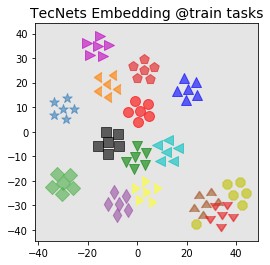

In [22]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(train_mean)

fig, ax = plt_base("TecNets Embedding @train tasks")
for i in range(15):
    plt.scatter(X_reduced[i*6:(i+1)*6, 0], X_reduced[i*6:(i+1)*6, 1], 
                color=colors[i], marker=markers[i], s=100, alpha=0.6, label=str(i))
plt.show()

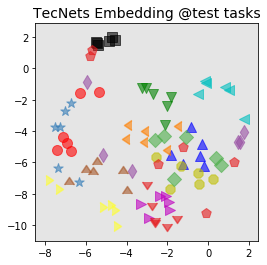

In [23]:
seed += 1
X_reduced = TSNE(n_components=2, random_state=seed).fit_transform(test_mean) # 6 # 12 # 15

fig, ax = plt_base("TecNets Embedding @test tasks")
for i in range(15):
    plt.scatter(X_reduced[i*6:(i+1)*6, 0], X_reduced[i*6:(i+1)*6, 1], 
                color=colors[i], marker=markers[i], s=100, alpha=0.6, label=str(i))
plt.show()

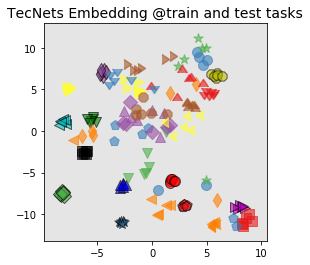

In [24]:
means = np.vstack([train_mean, test_mean])

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(means) # 6 # 12 # 15

fig, ax = plt_base("TecNets Embedding @train and test tasks")
for i in range(15):
    plt.scatter(X_reduced[i*6:(i+1)*6, 0], X_reduced[i*6:(i+1)*6, 1], 
                color=colors[i], marker=markers[i], s=100, alpha=0.6, label=str(i),
                linewidths="1", edgecolors="k")
for i in range(15,30):
    plt.scatter(X_reduced[i*6:(i+1)*6, 0], X_reduced[i*6:(i+1)*6, 1], 
                color=colors[i], marker=markers[i], s=100, alpha=0.6, label=str(i))
plt.show()